In [ ]:
import numpy as np

In [ ]:
fruits = np.load("fruits_300.npy")

In [ ]:
# 비지도 학습 : 문제집은 있는데 정답지가 없는것. 컴퓨터에게 문제집만 보고 패턴을 찾아서 정답지를 만드는 것
# 지도 학습을 하고 싶은데 정답지가 없어서 사람이 라벨링을 해야함. 근데 데이터가 너무 많아서 컴퓨터가 해야 하는 경우. 즉 컴퓨터 스스로 정답지를 만드는 것

In [ ]:
fruits.shape # 10000픽셀 짜리 이미지이다.

(300, 100, 100)

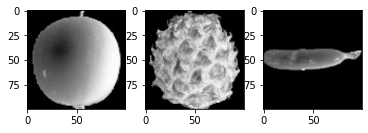

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.imshow(fruits[0], cmap = 'gray')
ax2.imshow(fruits[100], cmap = 'gray')
ax3.imshow(fruits[200], cmap = 'gray') # cmap = 'gray'는 0에 가까울 수록 흰 색으로 표현하는 것

In [ ]:
fruits[0] # 픽셀로 표현됨. 0에 가까울 수록 흰 색으로 표현하는 것

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

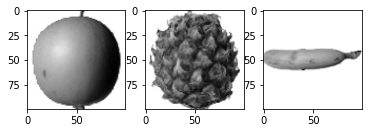

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.imshow(fruits[0], cmap = 'gray_r')
ax2.imshow(fruits[100], cmap = 'gray_r')
ax3.imshow(fruits[200], cmap = 'gray_r') # cmap = 'gray_r'는 1에 가까울 수록 흰 색으로 표현하는 것

In [ ]:
# 비지도 학습 : 평균값으로 학습을 하는 경우가 많아
fruits2 = fruits.reshape(300, 100*100) # 300의 100 X 100 픽셀을 다 펴서, 즉 flatten해서 일자로 피는 것! 컴퓨터가 읽기 편하게!
fruits2.shape

(300, 10000)

In [ ]:
fruits2

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [ ]:
apple = fruits2[:100]
pineapple = fruits2[100:200]
banana = fruits2[200:]

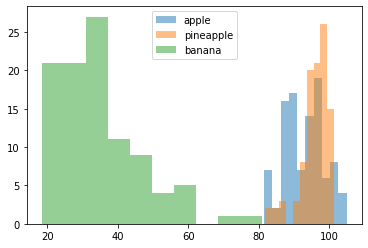

In [ ]:
plt.hist(np.mean(apple, axis = 1), alpha = 0.5) # axis = 1는 행 방향으로 평균을 낸가는 것, 즉 각 사진들의 픽셀들 평균값을 구한다는 뜻
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.5) # alpha = 0.5는 그래프의 투명도를 의미
plt.hist(np.mean(banana, axis = 1), alpha = 0.5)
plt.legend(['apple', 'pineapple', 'banana'])

<BarContainer object of 10000 artists>

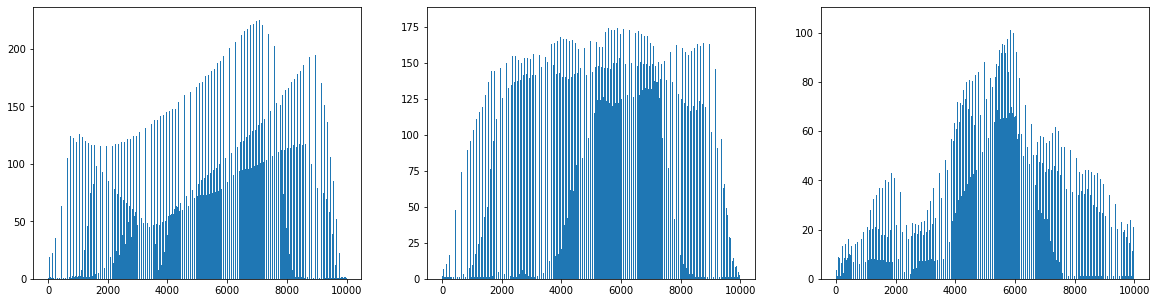

In [ ]:
fig = plt.figure(figsize = (20, 5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.bar(range(10000), np.mean(apple, axis = 0))
ax2.bar(range(10000), np.mean(pineapple, axis = 0))
ax3.bar(range(10000), np.mean(banana, axis = 0))

In [ ]:
# 300장 사진 다 섞임 - 사과 사진 평균 : 0에 가까울 수록 사과 사진이 아닐까?
apple_mean = np.mean(apple, axis = 0).reshape(100, 100) # 평균 낸 후 다시 픽셀 형태로 바꾸므로 이거는 100개의 사진을 다 곂친듯한 느낌이 나온다.
apple_mean

array([[1.01, 1.01, 1.01, ..., 1.  , 1.  , 1.  ],
       [1.01, 1.01, 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       ...,
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ]])

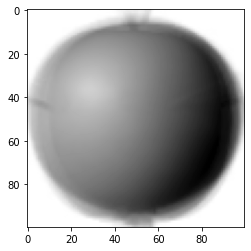

In [ ]:
plt.imshow(apple_mean, cmap = 'gray_r')

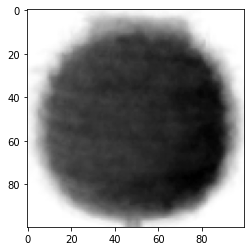

In [ ]:
pineapple_mean = np.mean(pineapple, axis = 0).reshape(100, 100) # 평균 낸 후 다시 픽셀 형태로 바꾸므로 이거는 100개의 사진을 다 곂친듯한 느낌이 나온다.
pineapple_mean
plt.imshow(pineapple_mean, cmap = 'gray_r')

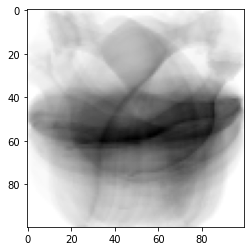

In [ ]:
banana_mean = np.mean(banana, axis = 0).reshape(100, 100) # 평균 낸 후 다시 픽셀 형태로 바꾸므로 이거는 100개의 사진을 다 곂친듯한 느낌이 나온다.
banana_mean
plt.imshow(banana_mean, cmap = 'gray_r')

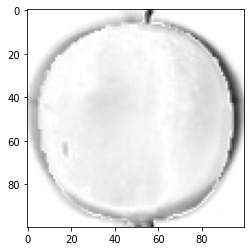

In [ ]:
abs_diff = abs(fruits - apple_mean) # 사진에 사과사진 평균값을 빼서 흰 배경화면에 가까울 수록 사과에 가까워

plt.imshow(abs_diff[0], cmap = 'gray_r')

In [ ]:
abs_diff = abs(fruits - apple_mean) # 사진에 사과사진 평균값을 빼서 흰 배경화면에 가까울 수록 사과에 가까워
abs_mean = np.mean(abs_diff, axis = (1,2)) # axis = (1,2)이거 한 이유?
abs_mean

array([17.37576 , 13.508874, 17.183394, 15.68311 , 17.983306, 20.565392,
       16.795812, 16.144276, 19.611994, 21.32059 , 16.454222, 16.590134,
       13.37039 , 17.23263 , 15.92806 , 15.496638, 18.582212, 16.48196 ,
       27.651556, 19.7871  , 20.826912, 16.417934, 17.059946, 15.904296,
       15.086176, 19.371364, 24.076362, 14.777732, 19.20517 , 20.805182,
       14.797906, 18.658418, 15.973216, 13.04259 , 18.381052, 16.59904 ,
       16.288504, 18.960586, 13.88574 , 16.497594, 18.40376 , 19.174642,
       29.096702, 18.40849 , 28.223962, 21.42994 , 19.740466, 15.590532,
       13.082678, 18.765996, 14.391198, 21.464746, 26.261028, 15.887148,
       18.568706, 16.410426, 17.108034, 13.178824, 18.199846, 13.503056,
       20.845032, 16.898184, 22.81774 , 18.99896 , 19.102706, 16.636216,
       14.845644, 19.357872, 14.778086, 14.468082, 13.085526, 15.946606,
       20.42774 , 16.241996, 13.720382, 18.416166, 15.229106, 16.411342,
       13.47148 , 20.050622, 17.296816, 21.071312, 

In [ ]:
# 전체 과일에서 사과 평균을 뺀 것중에 가장 작은것부터 100등까지가 사과이지 않을까?
# 300장 사진 다 섞임 - 사과 사진 평균 = 0에 가까울수록 사과
abs_diff = abs(fruits - apple_mean) # 사진에 사과사진 평균값을 빼서 흰 배경화면에 가까울 수록 사과에 가까워
abs_mean = np.mean(abs_diff, axis = (1,2))
apple_index = np.argsort(abs_mean)[:100]
apple_index

array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 68,
       30, 66, 24, 76, 98, 15, 84, 47, 90,  3, 94, 53, 23, 14, 71, 32,  7,
       73, 36, 55, 77, 21, 10, 17, 39, 99, 95, 11, 35, 65,  6, 61, 22, 56,
       89,  2, 13, 80,  0, 97,  4, 58, 34, 40, 43, 75, 82, 54, 16, 31, 49,
       93, 37, 63, 64, 41, 28, 67, 25, 96,  8, 83, 46, 19, 79, 72,  5, 85,
       29, 20, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42])

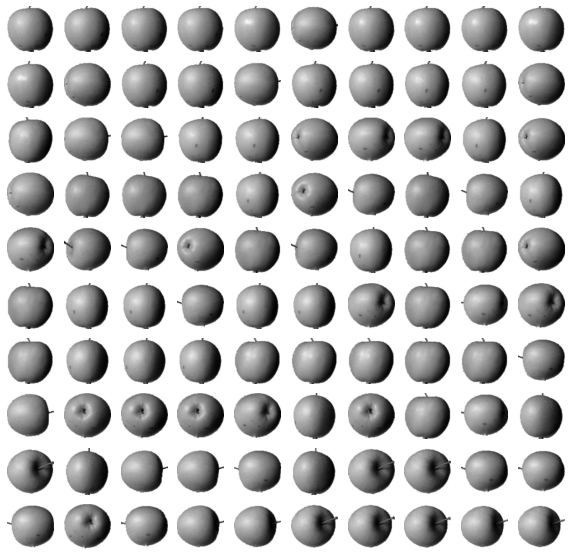

In [ ]:
abs_diff = abs(fruits - apple_mean) # 사진에 사과사진 평균값을 빼서 흰 배경화면에 가까울 수록 사과에 가까워
abs_mean = np.mean(abs_diff, axis = (1,2))
apple_index = np.argsort(abs_mean)[:100]
fix, axs = plt.subplots(10, 10, figsize = (10, 10)) # figsize = (10, 10) 이거 하면 자리 자동 할당해줌

for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap = 'gray_r')
        axs[i, j].axis('off') # 축 제거

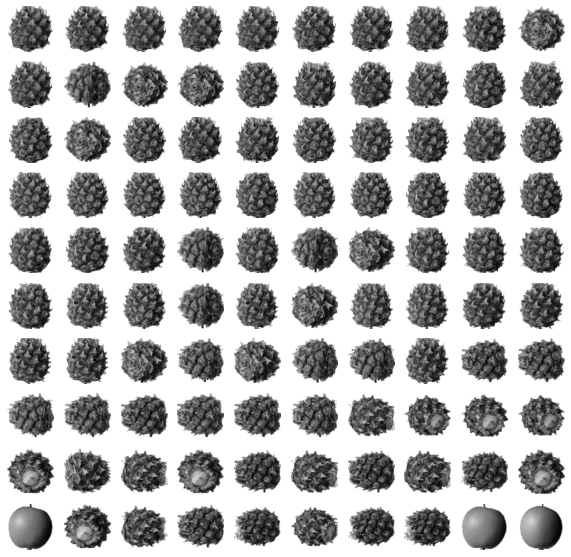

In [ ]:
abs_diff = abs(fruits - pineapple_mean) # 사진에 사과사진 평균값을 빼서 흰 배경화면에 가까울 수록 사과에 가까워
abs_mean = np.mean(abs_diff, axis = (1,2))
pineapple_index = np.argsort(abs_mean)[:100]
fix, axs = plt.subplots(10, 10, figsize = (10, 10)) # figsize = (10, 10) 이거 하면 자리 자동 할당해줌

for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[pineapple_index[i*10 + j]], cmap = 'gray_r')
        axs[i, j].axis('off') # 축 제거

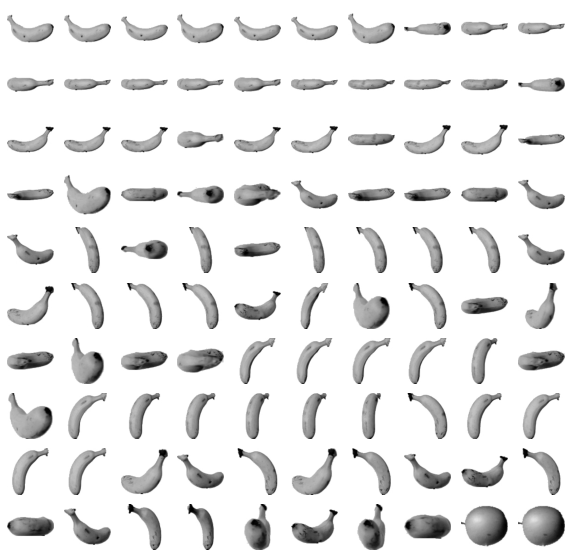

In [ ]:
abs_diff = abs(fruits - banana_mean) # 사진에 사과사진 평균값을 빼서 흰 배경화면에 가까울 수록 사과에 가까워
abs_mean = np.mean(abs_diff, axis = (1,2))
banana_index = np.argsort(abs_mean)[:100]
fix, axs = plt.subplots(10, 10, figsize = (10, 10)) # figsize = (10, 10) 이거 하면 자리 자동 할당해줌

for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap = 'gray_r')
        axs[i, j].axis('off') # 축 제거

In [ ]:
# 평균으로 비지도 학습을 해 주는 라이브러리
from sklearn.cluster import KMeans

In [ ]:
# 랜덤으로 점을 뿌리고, 가까운 값들의 평균값으로 계속해서 그 점들이 이동을 한다. 더이상 점들이 안움직일때까지! 더이상 안움직이면 학습 끝

In [ ]:
km = KMeans(n_clusters = 3)
km.fit(fruits2)

KMeans(n_clusters=3)

In [ ]:
km.labels_ # 군집화한 결과! 이건 랜덤으로 점을 뿌리므로 결과가 계속해서 달라질 것이다.

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [ ]:
target = km.labels_ # 정답지 형성

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
fruits_scaled = fruits2 / 255 # 이미지의 픽셀값은 함수 따로 쓸 필요 없이 걍 255로 나누면 됨


train_scaled, test_scaled, train_target, test_target = train_test_split(fruits_scaled, target)
knn = KNeighborsClassifier()
knn.fit(train_scaled, train_target)
knn.score(test_scaled, test_target)

0.9866666666666667

In [ ]:
np.unique(km.labels_, return_counts = True) # km.labels_에 어떤 라벨링까지 들어있는지 보여준다, return_counts = True를 하면 각 라벨들의 개수까지 보여준다.
# 즉, km = KMeans(n_clusters = 3)가 어떤 방식으로 데이터를 군집화했는지 알려준다.

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))

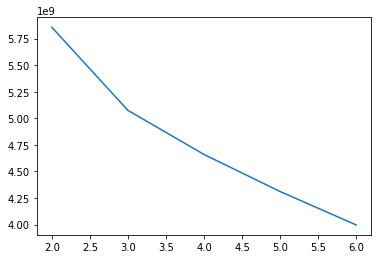

In [ ]:
# 몇 종류의 과일이 있는지 모르면 어떻게해?
# 군집을 대충 나눠보고, 각각의 거리를 구해서 저장한다. 2그룹...3그룹...4그룹으로 계속 나눠가다가 갑자기 거리가 확 꺾이는 부분이 최적의 군집 수이다.
box = []
for i in range(2,7):
    km = KMeans(n_clusters = i)
    km.fit(fruits2)
    box.append(km.inertia_) # km.inertia_ : 랜덤으로 뿌리고 그 점들과 데이터 값의 제곱합을 구하는 것이다.
plt.plot(range(2,7), box)

In [ ]:
fruits2.shape

(300, 10000)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

target = [0]*100 + [1]*100 + [2]*100 # 강제로 정답지를 만든 것임
train_input, test_input, train_target, test_target = train_test_split(fruits2, target)
rf = RandomForestClassifier()
rf.fit(train_input, train_target)
rf.score(test_input, test_target) # 10000개의 픽셀로 학습을 한 것이라고 할 수 있다.

1.0

In [ ]:
# 이미지가 FHD, QHD, 4K 등이면 픽셀이 진짜 너무 많아서 그냥 학습시키디는 에바임
# PCA 주성분분석 : 픽셀값으로 학습하는 것이 아닌 이미지의 특성으로 학습
# 이미지를 가장 대표할 수 있는 벡터를 찾고, 주위 점들로의 또 다른 벡터, 즉 2개로 이미지를 표현한다.
# 가장 대표할 수 있는 주성분 벡터 2개로 이미지 표현

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) # 이 의미는 10000개의 픽셀을 50개의 주성분 벡터로 줄여서 표현하겠다는 뜻

fruits_pca = pca.fit_transform(fruits2) # 50개의 주성분을 찾아낼 것이다.

In [ ]:
pca.components_.shape # (50, 10000) : 이 뜻은 50개의 주성분을 찾았고, 10000개의 데이터를 참고했다는 뜻

(50, 10000)

In [ ]:
fruits_pca.shape # 300개의 사진이 픽셀이 아닌 50개의 주성분으로 표현되었다.

(300, 50)

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca) # 다시 주성분을 픽셀로 변경. 즉 줄였다가 확대시킨 것
fruits_inverse.shape # 제대로 복원되지는 않았을 것이다. 이미지 깨져있을것임

(300, 10000)

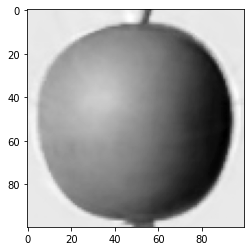

In [ ]:
plt.imshow(fruits_inverse[0].reshape(100,100), cmap = 'gray_r')

In [ ]:
pca.explained_variance_ratio_ # 주성분을 중요한 순서로 50개를 나열한것!

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511202, 0.00486383, 0.00480346,
       0.00447835, 0.00437318, 0.0040804 , 0.00389477, 0.00372446,
       0.00359273, 0.00331444, 0.00317817, 0.00304292, 0.00303659,
       0.00288883, 0.00275856, 0.00264721, 0.00255819, 0.00252058,
       0.00247288, 0.00239597, 0.00230762, 0.00222109, 0.00216028,
       0.00213662, 0.00196201, 0.0019311 , 0.00190816, 0.00183598,
       0.00182314, 0.00173081, 0.00169618, 0.00162099, 0.00161041])

In [ ]:
sum(pca.explained_variance_ratio_) # 원본 데이터의 92%를 설명하고 있다는 뜻

0.9215628672029119

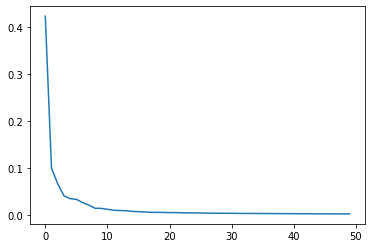

In [ ]:
plt.plot(pca.explained_variance_ratio_) # 이 그래프의 아래를 다 적분하면 1이다. 즉 이 그래프를 보면 주성분의 10개까지만
                                        # 가져와도 대부분의 픽셀을 다 설명 가능하다는 것을 알 수 있다.

In [ ]:
pca = PCA(n_components=2) # 2개의 주성분만 가지고 온 것
fruits_pca = pca.fit_transform(fruits2)
fruits_pca.shape

(300, 2)

In [ ]:
fruits_pca # 2개의 주성분만 짝지어져 있음을 알 수 있다.

array([[-2778.41779459, -1571.87380996],
       [-3078.27365136, -2739.27040931],
       [-2620.61072939, -1486.87055304],
       [-3113.71771062, -2530.02283038],
       [-2520.64705144, -2330.6479121 ],
       [-1556.73860341,   123.05166042],
       [-2711.38755162, -1857.35297457],
       [-2884.74283654, -1836.15286414],
       [-2310.99240338, -2660.46264955],
       [-1521.26665012, -2445.37438279],
       [-2486.91643797, -1475.55043796],
       [-2800.83912843, -2001.07115857],
       [-2810.56248913, -2034.36322683],
       [-2209.09841637, -2303.76592187],
       [-2917.38810303, -2438.42530927],
       [-2198.1718942 ,  -636.80184754],
       [-2317.61818126, -2704.80151506],
       [-3289.84664277, -2436.39343766],
       [-2641.95018377,   503.74908604],
       [-3563.8760831 , -1290.01167056],
       [-3708.64597097, -1575.3361771 ],
       [-2423.96625858, -2080.63343849],
       [-3169.13983546, -2238.74224172],
       [-3059.33441459, -2250.14899848],
       [-2745.82

In [ ]:
import pandas as pd

km = KMeans(n_clusters=3)
km.fit(fruits_pca) # 2개밖에 없는 주성분으로 학습을 시켜볼것임. 즉 군집화해볼것. 과연 정확할까?

KMeans(n_clusters=3)

In [ ]:
df = pd.DataFrame(fruits_pca, columns = ['c1', 'c2'])
df['target'] = km.labels_ # KMeans가 라벨링 해준 것을 정답지로!
df

,c1,c2,target
0,-2778.417795,-1571.873810,2
1,-3078.273651,-2739.270409,2
2,-2620.610729,-1486.870553,2
3,-3113.717711,-2530.022830,2
4,-2520.647051,-2330.647912,2
...,...,...,...
295,4955.542497,-1145.276760,1
296,5746.358051,1927.059833,1
297,5182.128683,121.760516,1
298,3987.988006,-70.881606,1


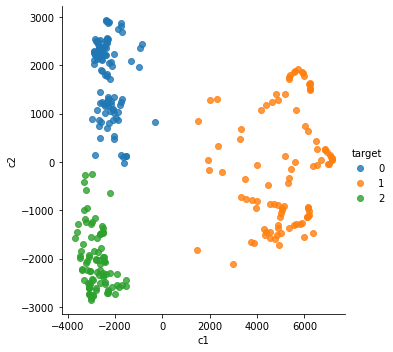

In [ ]:
import seaborn as sns

sns.lmplot(x = 'c1', y = 'c2', data = df, fit_reg = False, hue = 'target')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
train_input, test_input, train_target, test_target = train_test_split(fruits2, target)

rf = RandomForestClassifier()
rf.fit(train_input, train_target)
rf.score(test_input, test_target)

1.0

In [ ]:
sum(pca.explained_variance_ratio_) # 2개의 주성분은 52%정도의 이미지만 표현

0.5229877245800604

In [ ]:
pca = PCA(n_components=0.99) # 이 의미는 99%의 설명력을 갖는 주성분들을 자동으로 맞춰서 가져와준다.
fruits_pca = pca.fit_transform(fruits2)
fruits_pca.shape

(300, 162)

In [ ]:
from sklearn.datasets import make_blobs

data, target = make_blobs(n_samples=1000, n_features=2) # n_samples=1000, n_features=2 : 샘플의 개수는 1000개, 특성은 2개

In [ ]:
data.shape

(1000, 2)

In [ ]:
target

array([2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0,
       1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1, 2, 0, 2, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0,
       1, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2,
       1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 0, 2,
       2, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 0,
       0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 1, 0,
       0, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0,
       0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 0, 1, 2, 2, 2,

In [ ]:
df = pd.DataFrame(data, columns = ['c1', 'c2'])
df['target'] = target
df

,c1,c2,target
0,-4.620339,-7.554086,2
1,-5.847446,-6.625285,2
2,-5.662611,-8.156749,2
3,-5.503269,-8.657260,2
4,1.459318,-9.024115,1
...,...,...,...
995,0.456852,-7.364391,1
996,-6.459894,-7.133677,2
997,-7.863445,-7.303834,2
998,-8.848504,1.014863,0


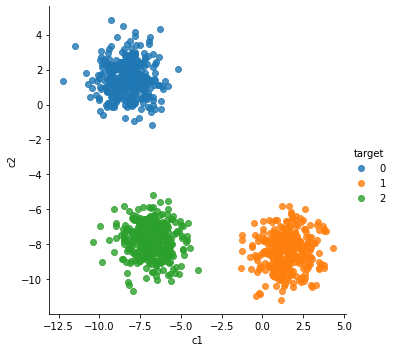

In [ ]:
import seaborn as sns

df = pd.DataFrame(data, columns = ['c1', 'c2'])
df['target'] = target

sns.lmplot(x = 'c1', y = 'c2', data = df, fit_reg = False, hue = 'target')

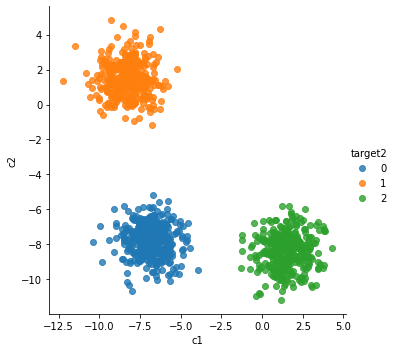

In [ ]:
import seaborn as sns

km = KMeans(n_clusters = 3)
km.fit(data)

df['target2'] = km.labels_

sns.lmplot(x = 'c1', y = 'c2', data = df, fit_reg = False, hue = 'target2')


In [ ]:
from sklearn.datasets import make_circles
import pandas as pd
import seaborn as sns

x, y = make_circles(n_samples = 1000, noise = 0.05, factor = 0.5) # noise가 높은 만큼 불규칙함. noise가 낮으면 엄청 예쁘고 규칙적임
                                                                  # factor는 군집끼리의 거리
df = pd.DataFrame(x, columns = ['c1', 'c2'])
df['target'] = y
df

,c1,c2,target
0,-0.401401,-0.372153,1
1,-0.396313,1.000709,0
2,-0.362614,-0.430363,1
3,-0.448838,-0.188124,1
4,0.839367,-0.538410,0
...,...,...,...
995,-0.240003,0.528313,1
996,-0.201867,-0.434554,1
997,0.426146,-0.286009,1
998,0.094560,-1.043978,0


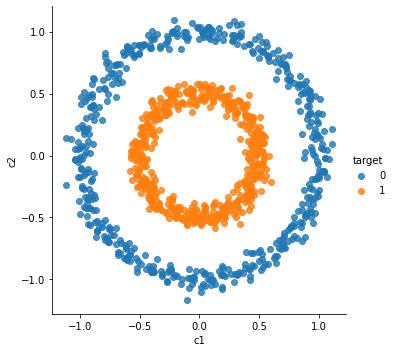

In [ ]:
sns.lmplot(x = 'c1', y = 'c2', fit_reg = False, data = df, hue = 'target') # 이거에 뭐라 했는데? 뭐지?

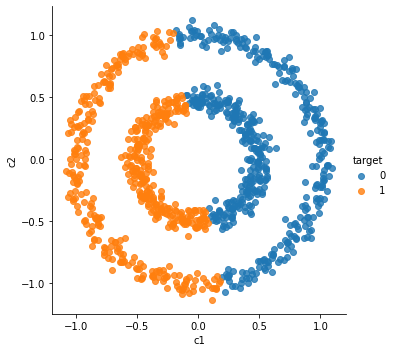

In [ ]:
# 실습 (왜 안된다고?? 설명 못들음)
from sklearn.datasets import make_circles
import pandas as pd
import seaborn as sns

x, y = make_circles(n_samples = 1000, noise = 0.05, factor = 0.5) # noise가 높은 만큼 불규칙함. noise가 낮으면 엄청 예쁘고 규칙적임
                                                                  # factor는 군집끼리의 거리
km = KMeans(n_clusters = 2)
km.fit(x)

df = pd.DataFrame(x, columns = ['c1', 'c2'])
df['target'] = km.labels_

sns.lmplot(x = 'c1', y = 'c2', data = df, fit_reg = False, hue = 'target')

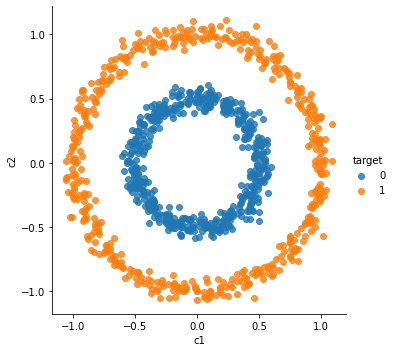

In [ ]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
# 데이터 분포 모양이 비선형(?) 이면 KMeans보다 DBSCAN을 써야해! DBSCAN는 원 반경을 조금씩 이동시키면서 밀도를 보고 그걸로 군집을 확인하는 것

x, y = make_circles(n_samples = 1000, noise = 0.05, factor = 0.5) # noise가 높은 만큼 불규칙함. noise가 낮으면 엄청 예쁘고 규칙적임
                                                                  # factor는 군집끼리의 거리
dbscan = DBSCAN(eps = 0.2, metric = 'euclidean', min_samples=10) # eps는 밀도를 판단하려는 반경, metric은 거리 측정 방식, min_samples는 eps의 반경에서 참고하는 데이터의 개수
dbscan.fit(x)

df = pd.DataFrame(x, columns = ['c1', 'c2'])
df['target'] = dbscan.labels_

sns.lmplot(x = 'c1', y = 'c2', data = df, fit_reg = False, hue = 'target')

In [ ]:
# 인공 신경망 라이브러리
wine = pd.read_csv("https://bit.ly/wine_csv_data")
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [ ]:
# 이진 크로스 엔트로피 : 결과가 0과 1이다. 즉 기냐 아니냐를 판단하는 것, 이중 분류
# 다중 크로스 엔트로피 : 결과가 여러개, 다중 분류

from tensorflow import keras

data = wine.iloc[:, :-1].to_numpy()
target = wine.iloc[:, -1].to_numpy()

In [ ]:
data[0].shape

(3,)

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

model = keras.Sequential() # plt.figure와 비슷한 기능. 인공신경망을 그리기 위한 도화지
model.add(keras.layers.Dense(1, activation = 'sigmoid', input_shape = (3,))) # 학습해야 하는 특성이 3개이므로 input_shape = (3,)를 넣어준다. 숫자 8은 은닉층의 노드 개수
                                                                             # 이진 분류이므로 activation 함수를 'sigmoid'로
model.compile(loss = 'binary_crossentropy', metrics = 'accuracy') # 어떻게 학습할 것인지도 방식을 알려줘야 함. loss 는 'binary_crossentropy', 거리(metrics)는 'accuracy'가 좋아지도록 학습을 하겠다는 뜻
history = model.fit(train_input, train_target, epochs = 30)

Epoch 1/30
163/163 [==============================] - 1s 1ms/step - loss: 2.3831 - accuracy: 0.7562
Epoch 2/30
163/163 [==============================] - 0s 1ms/step - loss: 1.7188 - accuracy: 0.7562
Epoch 3/30
163/163 [==============================] - 0s 1ms/step - loss: 1.0860 - accuracy: 0.7562
Epoch 4/30
163/163 [==============================] - 0s 1ms/step - loss: 0.6206 - accuracy: 0.7562
Epoch 5/30
163/163 [==============================] - 0s 1ms/step - loss: 0.4887 - accuracy: 0.7562
Epoch 6/30
163/163 [==============================] - 0s 1ms/step - loss: 0.4660 - accuracy: 0.7562
Epoch 7/30
163/163 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.7560
Epoch 8/30
163/163 [==============================] - 0s 1ms/step - loss: 0.4569 - accuracy: 0.7545
Epoch 9/30
163/163 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.7539
Epoch 10/30
163/163 [==============================] - 0s 1ms/step - loss: 0.4558 - accuracy: 0.7537

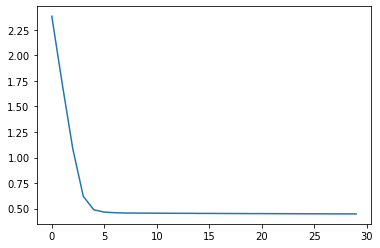

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [ ]:
from sklearn.preprocessing import StandardScaler # 이번엔 표준화 시킬 거임
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

ss = StandardScaler() # 이번엔 표준화 시킬 거임
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.fit_transform(test_input)

model = keras.Sequential() # plt.figure와 비슷한 기능. 인공신경망을 그리기 위한 도화지
model.add(keras.layers.Dense(1, activation = 'sigmoid', input_shape = (3,))) # 학습해야 하는 특성이 3개이므로 input_shape = (3,)를 넣어준다. 숫자 8은 은닉층의 노드 개수
                                                                             # 이진 분류이므로 activation 함수를 'sigmoid'로
model.compile(loss = 'binary_crossentropy', metrics = 'accuracy') # 어떻게 학습할 것인지도 방식을 알려줘야 함. loss 는 'binary_crossentropy', 거리(metrics)는 'accuracy'가 좋아지도록 학습을 하겠다는 뜻
history = model.fit(train_scaled , train_target, epochs = 30) # 이번엔 표준화 시킨 데이터를 모델에 넣었음


Epoch 1/30
163/163 [==============================] - 1s 1ms/step - loss: 0.6721 - accuracy: 0.6319
Epoch 2/30
163/163 [==============================] - 0s 1ms/step - loss: 0.6113 - accuracy: 0.6669
Epoch 3/30
163/163 [==============================] - 0s 1ms/step - loss: 0.5627 - accuracy: 0.7054
Epoch 4/30
163/163 [==============================] - 0s 1ms/step - loss: 0.5238 - accuracy: 0.7377
Epoch 5/30
163/163 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.7676
Epoch 6/30
163/163 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7778
Epoch 7/30
163/163 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.7845
Epoch 8/30
163/163 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.7856
Epoch 9/30
163/163 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.7841
Epoch 10/30
163/163 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.7814

In [ ]:
model.evaluate(test_scaled, test_target) # keras는 평가, 즉 score는 evaluate를 써야 한다. 가장 최종적으로 평가하는 거!

41/41 [==============================] - 0s 1ms/step - loss: 0.4136 - accuracy: 0.7854


[0.41362252831459045, 0.7853845953941345]

In [ ]:
from sklearn.preprocessing import StandardScaler # 이번엔 표준화 시킬 거임
from sklearn.model_selection import train_test_split

# 훈련 데이터, 검증 데이터, 시험 데이터 3개를 만들 거임
# 검증 데이터를 만드는 이유? : 시험 데이터로 검증을 해버리면 시험 데이터에 맞는 모델이 되어버린다.그렇기에 시험 데이터는 마지막 최종으로 평가하는 것이다. 검증 데이터는 마치 epoch마다 쪽지시험을 보는 느낌이다.
#                            : 훈련데이터로 학습하고 그것의 일부를 랜덤으로 평가하는 쪽지시험용 검증 데이터 val_input과 val_target을 만들어줘야 한다.
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2)

ss = StandardScaler() # 이번엔 표준화 시킬 거임
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.fit_transform(test_input)
val_scaled = ss.transform(val_input)


model = keras.Sequential() # plt.figure와 비슷한 기능. 인공신경망을 그리기 위한 도화지
model.add(keras.layers.Dense(1, activation = 'sigmoid', input_shape = (3,))) # 학습해야 하는 특성이 3개이므로 input_shape = (3,)를 넣어준다. 숫자 8은 은닉층의 노드 개수
                                                                             # 이진 분류이므로 activation 함수를 'sigmoid'로
model.compile(loss = 'binary_crossentropy', metrics = 'accuracy') # 어떻게 학습할 것인지도 방식을 알려줘야 함. loss 는 'binary_crossentropy', 거리(metrics)는 'accuracy'가 좋아지도록 학습을 하겠다는 뜻
history = model.fit(train_scaled , train_target, epochs = 100, validation_data=(val_scaled, val_target)) # 이번엔 표준화 시킨 데이터를 모델에 넣었음
# 130/130이라 나온 이유! 컴퓨터는 한번에 32개의 문제를 풀 수 있음. 그러므로 train_scaled.shape[0] / 32 하면 대략 130 나옴

Epoch 1/100
130/130 [==============================] - 4s 9ms/step - loss: 0.7409 - accuracy: 0.5631 - val_loss: 0.7175 - val_accuracy: 0.5721
Epoch 2/100
130/130 [==============================] - 1s 4ms/step - loss: 0.6852 - accuracy: 0.5860 - val_loss: 0.6643 - val_accuracy: 0.5962
Epoch 3/100
130/130 [==============================] - 1s 5ms/step - loss: 0.6359 - accuracy: 0.6197 - val_loss: 0.6184 - val_accuracy: 0.6221
Epoch 4/100
130/130 [==============================] - 1s 5ms/step - loss: 0.5927 - accuracy: 0.6505 - val_loss: 0.5790 - val_accuracy: 0.6625
Epoch 5/100
130/130 [==============================] - 1s 7ms/step - loss: 0.5563 - accuracy: 0.6827 - val_loss: 0.5462 - val_accuracy: 0.6962
Epoch 6/100
130/130 [==============================] - 1s 7ms/step - loss: 0.5254 - accuracy: 0.7197 - val_loss: 0.5200 - val_accuracy: 0.7192
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 0.5007 - accuracy: 0.7436 - val_loss: 0.4997 - val_accuracy: 0.7394

In [ ]:
train_scaled.shape[0] / 32  # 130/130이라 나온 이유! 컴퓨터는 한번에 32개의 문제를 풀 수 있음. 그러므로 train_scaled.shape[0] / 32 하면 대략 130 나옴

129.90625

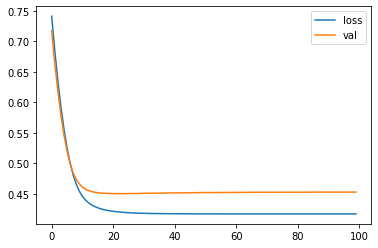

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val'])

In [ ]:
from sklearn.preprocessing import StandardScaler # 이번엔 표준화 시킬 거임
from sklearn.model_selection import train_test_split

# 훈련 데이터, 검증 데이터, 시험 데이터 3개를 만들 거임
# 검증 데이터를 만드는 이유? : 시험 데이터로 검증을 해버리면 시험 데이터에 맞는 모델이 되어버린다.그렇기에 시험 데이터는 마지막 최종으로 평가하는 것이다. 검증 데이터는 마치 epoch마다 쪽지시험을 보는 느낌이다.
#                            : 훈련데이터로 학습하고 그것의 
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2)

ss = StandardScaler() # 이번엔 표준화 시킬 거임
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.fit_transform(test_input)
val_scaled = ss.transform(val_input)


model = keras.Sequential() # plt.figure와 비슷한 기능. 인공신경망을 그리기 위한 도화지
model.add(keras.layers.Dense(8, activation = 'sigmoid', input_shape = (3,))) # 학습해야 하는 특성이 3개이므로 input_shape = (3,)를 넣어준다. 숫자 8은 은닉층의 노드 개수
                                                                             # 이진 분류이므로 activation 함수를 'sigmoid'로

model.add(keras.layers.Dense(1, activation = 'sigmoid')) # 은닉층이 하나 더 추가된 것                                                                         
model.compile(loss = 'binary_crossentropy', metrics = 'accuracy') # 어떻게 학습할 것인지도 방식을 알려줘야 함. loss 는 'binary_crossentropy', 거리, 'accuracy'가 좋아지도록 학습을 하겠다는 뜻
history = model.fit(train_scaled , train_target, epochs = 100, validation_data=(val_scaled, val_target)) # 이번엔 표준화 시킨 데이터를 모델에 넣었음

Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.7476 - accuracy: 0.4299 - val_loss: 0.6319 - val_accuracy: 0.7019
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.7395 - val_loss: 0.5169 - val_accuracy: 0.7644
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7580 - val_loss: 0.4788 - val_accuracy: 0.7644
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7580 - val_loss: 0.4582 - val_accuracy: 0.7644
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.7599 - val_loss: 0.4434 - val_accuracy: 0.7702
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.7662 - val_loss: 0.4325 - val_accuracy: 0.7760
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.7794 - val_loss: 0.4253 - val_accuracy: 0.7856

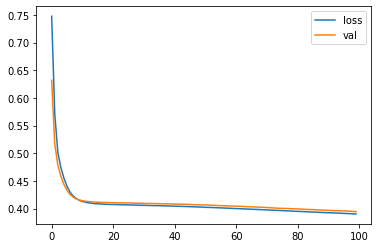

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val'])

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 32        
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.preprocessing import StandardScaler # 이번엔 표준화 시킬 거임
from sklearn.model_selection import train_test_split

# 훈련 데이터, 검증 데이터, 시험 데이터 3개를 만들 거임
# 검증 데이터를 만드는 이유? : 시험 데이터로 검증을 해버리면 시험 데이터에 맞는 모델이 되어버린다.그렇기에 시험 데이터는 마지막 최종으로 평가하는 것이다. 검증 데이터는 마치 epoch마다 쪽지시험을 보는 느낌이다.
#                            : 훈련데이터로 학습하고 그것의 
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2)

ss = StandardScaler() # 이번엔 표준화 시킬 거임
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.fit_transform(test_input)
val_scaled = ss.transform(val_input)


model = keras.Sequential() # plt.figure와 비슷한 기능. 인공신경망을 그리기 위한 도화지
model.add(keras.layers.Dense(8, activation = 'relu', input_shape = (3,))) # 학습해야 하는 특성이 3개이므로 input_shape = (3,)를 넣어준다. 숫자 8은 은닉층의 노드 개수
                                                                             # 은닉층에는 기울기 소실 방지를 위해 relu로 activation 함수를 쓴다.

model.add(keras.layers.Dense(4, activation = 'relu'))# 은닉층에는 기울기 소실 방지를 위해 relu로 activation 함수를 쓴다. 
model.add(keras.layers.Dense(1, activation = 'sigmoid')) # 최종 출력은 확률을 얻기 위해 sigmoid를 쓴다. 

model.compile(loss = 'binary_crossentropy', metrics = 'accuracy') # 어떻게 학습할 것인지도 방식을 알려줘야 함. loss 는 'binary_crossentropy', 거리, 'accuracy'가 좋아지도록 학습을 하겠다는 뜻
history = model.fit(train_scaled , train_target, epochs = 100, validation_data=(val_scaled, val_target)) # 이번엔 표준화 시킨 데이터를 모델에 넣었음

Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.6942 - accuracy: 0.6072 - val_loss: 0.6092 - val_accuracy: 0.7788
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.7736 - val_loss: 0.5014 - val_accuracy: 0.7856
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 0.4733 - accuracy: 0.7787 - val_loss: 0.4421 - val_accuracy: 0.7846
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.7893 - val_loss: 0.4168 - val_accuracy: 0.7962
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.7929 - val_loss: 0.4074 - val_accuracy: 0.8067
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.7917 - val_loss: 0.4027 - val_accuracy: 0.8096
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.7941 - val_loss: 0.4006 - val_accuracy: 0.8067

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 8)                 32        
                                                                 
 dense_21 (Dense)            (None, 4)                 36        
                                                                 
 dense_22 (Dense)            (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(test_scaled, test_target) # keras는 평가, 즉 score는 evaluate를 써야 한다. 시험 데이터로 가장 최종적으로 평가하는 거!

41/41 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.8538


[0.32947346568107605, 0.8538461327552795]

In [ ]:
# 역시 정형데이터는 트리 기반이 성능 잘나옴. 딥러닝보다 랜덤 포레스트가 accuracy 잘 나오잖아 봐바....
rf = RandomForestClassifier()
rf.fit(train_scaled, train_target)
rf.score(test_scaled, test_target)

0.8838461538461538

In [ ]:
(train_input, train_target) ,(test_input, test_target) = keras.datasets.mnist.load_data()

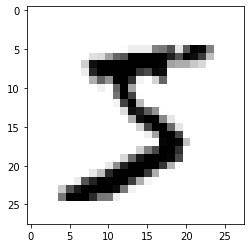

In [ ]:
plt.imshow(train_input[0], cmap = 'gray_r')

In [ ]:
train_target[0]

5

In [ ]:
train_input.shape

(60000, 28, 28)

In [ ]:
test_input.shape

(10000, 28, 28)

In [ ]:
np.unique(train_target, return_counts = True)  # train_target에 어떤 라벨링까지 들어있는지 보여준다, return_counts = True를 하면 각 라벨들의 개수까지 보여준다.
# 즉, train_target이 어떤 방식으로 데이터를 군집화했는지 알려준다.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
np.unique(test_target, return_counts = True)  # test_target에 어떤 라벨링까지 들어있는지 보여준다, return_counts = True를 하면 각 라벨들의 개수까지 보여준다.
# 즉, test_target이 어떤 방식으로 데이터를 군집화했는지 알려준다.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [ ]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.1)

train_scaled = train_input.reshape(-1, 28*28) / 255 # dense, 즉 입력층에 넣기 위해 flatten하는 과정. 표준화까지 한 것임!
val_scaled = val_input.reshape(-1, 28*28) / 255 # dense, 즉 입력층에 넣기 위해 flatten하는 과정. 표준화까지 한 것임!
test_scaled = test_input.reshape(-1, 28*28) / 255 # dense, 즉 입력층에 넣기 위해 flatten하는 과정. 표준화까지 한 것임!

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'relu', input_shape = (28*28,)))
model.add(keras.layers.Dense(10, activation = 'softmax')) # 정답이 10개이기 때문에 10을 맞춰줘야 한다.
          # softmax는 확률 여러개가 나옴. sigmoid는 확률 하나만 나옴. 즉, softmax는 모든 sigmoid를 더한 값이 분모로 가고 각각의 sigmoid 값이 분자로 가서 확률을 계산해줌
model.compile(loss = 'categorical_crossentropy', metrics = 'accuracy') # 다중 분류이므로 loss = 'categorical_crossentropy'이다.


In [ ]:
# 다중 분류는 결과 값을 원핫인코딩 해주어야 함. 그래야 결과 비교 가능. model을 통과했을 때 결과가 10개가 나오는데 실제 target은 숫자 하나이기 때문
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
train_target = oh.fit_transform(train_target.reshape(-1, 1), 10).toarray()
test_target = oh.fit_transform(test_target.reshape(-1, 1), 10).toarray()
val_target = oh.fit_transform(val_target.reshape(-1, 1), 10).toarray()

In [ ]:
history = model.fit(train_scaled , train_target, epochs = 30, validation_data=(val_scaled, val_target))

Epoch 1/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2804 - accuracy: 0.9214 - val_loss: 0.1740 - val_accuracy: 0.9505
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1375 - accuracy: 0.9596 - val_loss: 0.1289 - val_accuracy: 0.9640
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1021 - accuracy: 0.9695 - val_loss: 0.1249 - val_accuracy: 0.9637
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0826 - accuracy: 0.9761 - val_loss: 0.1062 - val_accuracy: 0.9702
Epoch 5/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0696 - accuracy: 0.9802 - val_loss: 0.1110 - val_accuracy: 0.9708
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0609 - accuracy: 0.9827 - val_loss: 0.0984 - val_accuracy: 0.9753
Epoch 7/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0536 - accuracy: 0.9847 - val_loss: 0.1029 - val_accuracy:

In [ ]:
(train_input, train_target) ,(test_input, test_target) = keras.datasets.mnist.load_data()
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.1)

train_scaled = train_input.reshape(-1, 28*28) / 255 # dense, 즉 입력층에 넣기 위해 flatten하는 과정. 표준화까지 한 것임!
val_scaled = val_input.reshape(-1, 28*28) / 255 # dense, 즉 입력층에 넣기 위해 flatten하는 과정. 표준화까지 한 것임!
test_scaled = test_input.reshape(-1, 28*28) / 255 # dense, 즉 입력층에 넣기 위해 flatten하는 과정. 표준화까지 한 것임!

model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'relu', input_shape = (28*28,)))
model.add(keras.layers.Dense(10, activation = 'softmax')) # 정답이 10개이기 때문에 10을 맞춰줘야 한다.
          # softmax는 확률 여러개가 나옴. sigmoid는 확률 하나만 나옴. 즉, softmax는 모든 sigmoid를 더한 값이 분모로 가고 각각의 sigmoid 값이 분자로 가서 확률을 계산해줌
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy') # 다중 분류이므로 loss = 'categorical_crossentropy'이다.
#sparse_를 loss에 붙여주면 알아서 원핫인코딩 해주니까 편하다!
history = model.fit(train_scaled , train_target, epochs = 30, validation_data=(val_scaled, val_target))

Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2799 - accuracy: 0.9201 - val_loss: 0.1494 - val_accuracy: 0.9562
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1352 - accuracy: 0.9611 - val_loss: 0.1101 - val_accuracy: 0.9692
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0995 - accuracy: 0.9713 - val_loss: 0.1016 - val_accuracy: 0.9722
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0800 - accuracy: 0.9765 - val_loss: 0.0984 - val_accuracy: 0.9737
Epoch 5/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0677 - accuracy: 0.9803 - val_loss: 0.0928 - val_accuracy: 0.9748
Epoch 6/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0581 - accuracy: 0.9838 - val_loss: 0.0864 - val_accuracy: 0.9775
Epoch 7/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0521 - accuracy: 0.9855 - val_loss: 0.0941 - val_accuracy:

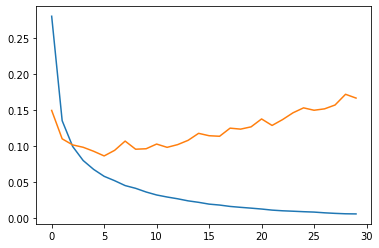

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) # 오버피팅(과대적합) 발생! 왜? 너무 과하게 공부해서 오히려 강아지에 가까운걸 고양이라고 판단함
#그렇기에 학습을 방해하는 스킬을 배워야함. 학습이 잘되는건 당연한 것이기 때문에 적당히 공부시켜야함


In [ ]:
(train_input, train_target) ,(test_input, test_target) = keras.datasets.mnist.load_data()
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.1)

train_scaled = train_input.reshape(-1, 28*28) / 255 # dense, 즉 입력층에 넣기 위해 flatten하는 과정. 표준화까지 한 것임!
val_scaled = val_input.reshape(-1, 28*28) / 255 # dense, 즉 입력층에 넣기 위해 flatten하는 과정. 표준화까지 한 것임!
test_scaled = test_input.reshape(-1, 28*28) / 255 # dense, 즉 입력층에 넣기 위해 flatten하는 과정. 표준화까지 한 것임!

model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'relu', input_shape = (28*28,)))
model.add(keras.layers.Dense(10, activation = 'softmax')) # 정답이 10개이기 때문에 10을 맞춰줘야 한다.
          # softmax는 확률 여러개가 나옴. sigmoid는 확률 하나만 나옴. 즉, softmax는 모든 sigmoid를 더한 값이 분모로 가고 각각의 sigmoid 값이 분자로 가서 확률을 계산해줌
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy') # 다중 분류이므로 loss = 'categorical_crossentropy'이다.
#sparse_를 loss에 붙여주면 알아서 원핫인코딩 해주니까 편하다!
es = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True) # 3번 이상 좋아지지 않으면 학습을 종료한다. 그리고 restore_best_weights = True의 의미는 좋아지지 않은 3번의 학습은 무시

history = model.fit(train_scaled , train_target, epochs = 3000, validation_data=(val_scaled, val_target), callbacks = [es]) # val_loss가 기준이 된다! 가장 좋았던 오차가 기준이 된다.

Epoch 1/3000
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2735 - accuracy: 0.9223 - val_loss: 0.1806 - val_accuracy: 0.9460
Epoch 2/3000
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1378 - accuracy: 0.9595 - val_loss: 0.1239 - val_accuracy: 0.9647
Epoch 3/3000
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1016 - accuracy: 0.9704 - val_loss: 0.1155 - val_accuracy: 0.9690
Epoch 4/3000
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0817 - accuracy: 0.9763 - val_loss: 0.1046 - val_accuracy: 0.9725
Epoch 5/3000
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0701 - accuracy: 0.9801 - val_loss: 0.1040 - val_accuracy: 0.9750
Epoch 6/3000
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0604 - accuracy: 0.9832 - val_loss: 0.0992 - val_accuracy: 0.9763
Epoch 7/3000
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0532 - accuracy: 0.9849 - val_loss: 0.0996 

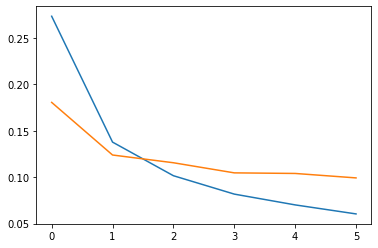

In [ ]:
plt.plot(history.history['loss'][:-3]) # earlystopping을 3으로 설정했기 때문에 뒤에서 3개는 빼고 그래프를 그리자
plt.plot(history.history['val_loss'][:-3])

In [ ]:
fifa = pd.read_csv('FIFA.csv')

del fifa['id']
del fifa['name']
fifa['contract_until'] = fifa['contract_until'].str[-4:].astype(int)
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   object 
 2   contract_until    8932 non-null   int64  
 3   position          8932 non-null   object 
 4   prefer_foot       8932 non-null   object 
 5   reputation        8932 non-null   float64
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   float64
 9   value             8932 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 697.9+ KB


In [ ]:
fifa2 = pd.get_dummies(fifa, drop_first = True)
fifa2

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,value,continent_asia,continent_europe,continent_oceania,continent_south america,position_GK,position_MF,position_ST,prefer_foot_right
0,31,2021,5.0,94,94,4.0,110500000.0,0,0,0,1,0,0,1,0
1,27,2020,4.0,91,93,1.0,72000000.0,0,1,0,0,1,0,0,1
2,31,2021,5.0,91,91,3.0,80000000.0,0,0,0,1,0,0,1,1
3,32,2020,4.0,91,91,3.0,51000000.0,0,1,0,0,0,0,0,1
4,25,2021,3.0,90,93,1.0,68000000.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,18,2019,1.0,48,63,3.0,60000.0,0,0,0,0,0,1,0,1
8928,19,2020,1.0,47,59,2.0,40000.0,0,1,0,0,0,0,0,1
8929,18,2021,1.0,47,64,2.0,50000.0,0,0,0,1,0,0,0,1
8930,18,2021,1.0,47,65,1.0,50000.0,0,1,0,0,1,0,0,1


In [ ]:
fifa2 = pd.get_dummies(fifa, drop_first=True)

data = fifa2.loc[:, fifa2.columns != 'value'].to_numpy()
target = fifa2['value'].to_numpy()

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
val_scaled = ss.transform(val_input)
test_scaled = ss.transform(test_input)

In [ ]:
train_scaled.shape

(5716, 14)

In [ ]:
val_scaled.shape

(1429, 14)

In [ ]:
test_scaled.shape

(1787, 14)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation = 'relu', input_shape = (14,))) # FIFA 데이터의 특성이 14개이다.
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(1)) # 결과로 나오는 y값이 우리가 원하는 값. 즉 이적료
          
model.compile(loss = 'mse', metrics = 'mae')
# mse : 평균 제곱 오차, mae : 평균 절댓값 오차
es = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True) # 3번 이상 좋아지지 않으면 학습을 종료한다. 그리고 restore_best_weights = True의 의미는 좋아지지 않은 3번의 학습은 무시

history = model.fit(train_scaled , train_target, epochs = 400, validation_data=(val_scaled, val_target), callbacks = [es]) # val_loss가 기준이 된다! 가장 좋았던 오차가 기준이 된다.

Epoch 1/3000
179/179 [==============================] - 1s 4ms/step - loss: 42029862092800.0000 - mae: 2761231.0000 - val_loss: 49714758156288.0000 - val_mae: 2966908.5000
Epoch 2/3000
179/179 [==============================] - 0s 3ms/step - loss: 42028259868672.0000 - mae: 2761111.7500 - val_loss: 49711507570688.0000 - val_mae: 2966700.2500
Epoch 3/3000
179/179 [==============================] - 1s 3ms/step - loss: 42023398670336.0000 - mae: 2760804.7500 - val_loss: 49703836188672.0000 - val_mae: 2966241.7500
Epoch 4/3000
179/179 [==============================] - 0s 2ms/step - loss: 42013848240128.0000 - mae: 2760207.2500 - val_loss: 49689776881664.0000 - val_mae: 2965422.7500
Epoch 5/3000
179/179 [==============================] - 0s 2ms/step - loss: 41997830193152.0000 - mae: 2759240.5000 - val_loss: 49668008443904.0000 - val_mae: 2964161.0000
Epoch 6/3000
179/179 [==============================] - 0s 2ms/step - loss: 41973733916672.0000 - mae: 2757786.0000 - val_loss: 496360184872

KeyboardInterrupt: ignored

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation = 'relu', input_shape = (14,))) # FIFA 데이터의 특성이 14개이다.
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(1)) # 결과로 나오는 y값이 우리가 원하는 값. 즉 이적료
          
model.compile(loss = 'mse', metrics = 'mae')
# mse : 평균 제곱 오차, mae : 평균 절댓값 오차
es = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True) # 3번 이상 좋아지지 않으면 학습을 종료한다. 그리고 restore_best_weights = True의 의미는 좋아지지 않은 3번의 학습은 무시

cp = keras.callbacks.ModelCheckpoint("best.h5") # val_loss 값이 제일 좋은 값을 따로 파일에 저장해준다. 학습이 끝났을 때 저장되어 있는 것이 가장 좋은 모델

history = model.fit(train_scaled , train_target, epochs = 400, validation_data=(val_scaled, val_target), callbacks = [es, cp]) # val_loss가 기준이 된다! 가장 좋았던 오차가 기준이 된다.
# callbacks = [es, cp], 즉 callbacks에 es와 cp를 동시에 넣어주는 것이 사용 방법

Epoch 1/400
179/179 [==============================] - 4s 10ms/step - loss: 42869809217536.0000 - mae: 2800680.5000 - val_loss: 47638552510464.0000 - val_mae: 2805185.7500
Epoch 2/400
179/179 [==============================] - 1s 6ms/step - loss: 42867972112384.0000 - mae: 2800550.5000 - val_loss: 47635364839424.0000 - val_mae: 2804980.2500
Epoch 3/400
179/179 [==============================] - 1s 4ms/step - loss: 42862741815296.0000 - mae: 2800210.2500 - val_loss: 47627487936512.0000 - val_mae: 2804516.2500
Epoch 4/400
179/179 [==============================] - 1s 4ms/step - loss: 42851723378688.0000 - mae: 2799544.7500 - val_loss: 47613290217472.0000 - val_mae: 2803703.0000
Epoch 5/400
179/179 [==============================] - 1s 4ms/step - loss: 42834711281664.0000 - mae: 2798488.7500 - val_loss: 47591869906944.0000 - val_mae: 2802483.5000
Epoch 6/400
179/179 [==============================] - 1s 3ms/step - loss: 42808861786112.0000 - mae: 2796935.5000 - val_loss: 47559804452864.00

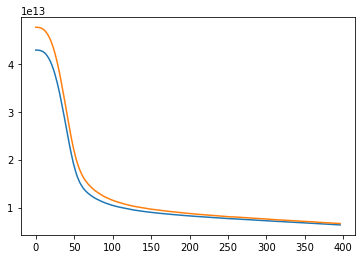

In [ ]:
plt.plot(history.history['loss'][:-3]) # earlystopping을 3으로 설정했기 때문에 뒤에서 3개는 빼고 그래프를 그리자
plt.plot(history.history['val_loss'][:-3])

In [ ]:
model.evaluate(test_scaled, test_target)

56/56 [==============================] - 0s 2ms/step - loss: 3973884411904.0000 - mae: 1013583.8125


[3973884411904.0, 1013583.8125]

In [ ]:
model.predict(test_scaled[0:1]) # test_scaled의 0번째 데이터를 넣었을때의 이적료 값을 예측해주는것.
# 반드시 model.predict에는 test_scaled[0:n] 이런 식으로 범위로 넣어주어야 함! 한 개짜리도 test_scaled[0:1] 이렇게 인덱싱하기!!!
# 왜냐하면 2차원으로 데이터를 넣어주어야 한다. 2차원으로 공부를 했으니까! 2차원 데이터가 들어가야 알아먹고 예측 가능
# test_scaled[0:n] 이런 식으로 주던가. 아니면 reshape(n,14) 써서 차원을 2차원으로 바꿔줘야해

array([[16074.206]], dtype=float32)

In [ ]:
model.predict(test_scaled[0].reshape(1, 14)) # 데이터 1개 짜리도 14열로 reshape 해서 2차원으로 해줘야해

array([[16074.206]], dtype=float32)

In [ ]:
test_scaled[0].reshape(1, 14)

array([[-0.04645067, -0.94336159, -0.30033081, -0.90789684, -1.3459594 ,
        -0.52362311, -0.30995005,  0.82863335, -0.14518594, -0.52417047,
        -0.35757669, -0.79131128, -0.49474591,  0.54905118]])

In [ ]:
test_scaled[0] # 이렇게 데이터를 입력해주면 안돼!

array([-0.04645067, -0.94336159, -0.30033081, -0.90789684, -1.3459594 ,
       -0.52362311, -0.30995005,  0.82863335, -0.14518594, -0.52417047,
       -0.35757669, -0.79131128, -0.49474591,  0.54905118])

In [ ]:
# 딥러닝 모델로 네이버 금융 크롤링 후에 예측해보자.
from bs4 import BeautifulSoup # python으로 HTML을 다루는 기능
import requests
import time
from tqdm import tqdm
me = {"User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6)"}

total = []
for n in tqdm(range(1,657)):
   
    url =requests.get("https://finance.naver.com/item/sise_day.naver?code=005930&page={}".format(n), headers = me) 
    html = BeautifulSoup(url.text)
    table = html.find('table')
    table = pd.read_html(str(table))[0].dropna()
    total.append(table)
    time.sleep(0.5)

100%|██████████| 656/656 [10:09<00:00,  1.08it/s]


In [ ]:
samsung = pd.concat(total, ignore_index=True) # 모든 데이터 합치기
samsung

NameError: ignored

In [ ]:
samsung2 = samsung[::-1]
samsung2 # 현재부터 과거로 가고 있기 때문에 인덱스 뒤집기 해야해

,날짜,종가,전일비,시가,고가,저가,거래량
6557,1996.06.25,67500.0,0.0,66500.0,68300.0,65600.0,112960.0
6556,1996.06.26,67700.0,200.0,67600.0,67900.0,66000.0,136630.0
6555,1996.06.27,66900.0,800.0,67500.0,67700.0,66700.0,155450.0
6554,1996.06.28,68100.0,1200.0,67300.0,68500.0,67200.0,138430.0
6553,1996.06.29,68500.0,400.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...,...
4,2022.08.02,61700.0,400.0,61200.0,61900.0,61000.0,13614895.0
3,2022.08.03,61300.0,400.0,61600.0,61600.0,61000.0,10053861.0
2,2022.08.04,61500.0,200.0,61700.0,61800.0,61200.0,9125439.0
1,2022.08.05,61500.0,0.0,61700.0,61900.0,61200.0,9567620.0


In [ ]:
samsung2.index = range(len(samsung2)) # 인덱스 재설정
samsung2

,날짜,종가,전일비,시가,고가,저가,거래량
0,1996.06.25,67500.0,0.0,66500.0,68300.0,65600.0,112960.0
1,1996.06.26,67700.0,200.0,67600.0,67900.0,66000.0,136630.0
2,1996.06.27,66900.0,800.0,67500.0,67700.0,66700.0,155450.0
3,1996.06.28,68100.0,1200.0,67300.0,68500.0,67200.0,138430.0
4,1996.06.29,68500.0,400.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...,...
6553,2022.08.02,61700.0,400.0,61200.0,61900.0,61000.0,13614895.0
6554,2022.08.03,61300.0,400.0,61600.0,61600.0,61000.0,10053861.0
6555,2022.08.04,61500.0,200.0,61700.0,61800.0,61200.0,9125439.0
6556,2022.08.05,61500.0,0.0,61700.0,61900.0,61200.0,9567620.0


In [ ]:
del samsung2['전일비']

In [ ]:
# 여기서부터는 내가 해본거. 그 전까지는 강사와 동일할 것!

del samsung2['날짜'] # 날짜는 내 생각에 없애야 할 것 같다고 생각했음

In [ ]:
samsung2

,종가,시가,고가,저가,거래량
0,67500.0,66500.0,68300.0,65600.0,112960.0
1,67700.0,67600.0,67900.0,66000.0,136630.0
2,66900.0,67500.0,67700.0,66700.0,155450.0
3,68100.0,67300.0,68500.0,67200.0,138430.0
4,68500.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...
6553,61700.0,61200.0,61900.0,61000.0,13614895.0
6554,61300.0,61600.0,61600.0,61000.0,10053861.0
6555,61500.0,61700.0,61800.0,61200.0,9125439.0
6556,61500.0,61700.0,61900.0,61200.0,9567620.0


In [ ]:
data = samsung2.iloc[:, 1:]
target = samsung2['종가']

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2)

In [ ]:
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
val_scaled = ss.transform(val_input)
test_scaled = ss.transform(test_input)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation = 'relu', input_shape = (4,))) # 주식 데이터의 특성이 14개이다.
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(1)) # 결과로 나오는 y값이 우리가 원하는 값. 즉 이적료
          
model.compile(loss = 'mse', metrics = 'mae')
# mse : 평균 제곱 오차, mae : 평균 절댓값 오차
es = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True) # 3번 이상 좋아지지 않으면 학습을 종료한다. 그리고 restore_best_weights = True의 의미는 좋아지지 않은 3번의 학습은 무시

cp = keras.callbacks.ModelCheckpoint("best.h5") # val_loss 값이 제일 좋은 값을 따로 파일에 저장해준다. 학습이 끝났을 때 저장되어 있는 것이 가장 좋은 모델

history = model.fit(train_scaled , train_target, epochs = 3000, validation_data=(val_scaled, val_target), callbacks = [es, cp]) # val_loss가 기준이 된다! 가장 좋았던 오차가 기준이 된다.
# callbacks = [es, cp], 즉 callbacks에 es와 cp를 동시에 넣어주는 것이 사용 방법

Epoch 1/3000


In [ ]:
model.predict(test_scaled[189].reshape(1,4))

In [ ]:
test_scaled[189].reshape(1,4)

array([[ 1.08526271,  1.06592539,  1.07579958, -0.40973033]])

In [ ]:
# 강사 풀이
samsung = pd.concat(total, ignore_index=True) # 모든 데이터 합치기
samsung = samsung[::-1]
samsung.index = range(len(samsung))
samsung

,날짜,종가,전일비,시가,고가,저가,거래량
0,1996.06.25,67500.0,0.0,66500.0,68300.0,65600.0,112960.0
1,1996.06.26,67700.0,200.0,67600.0,67900.0,66000.0,136630.0
2,1996.06.27,66900.0,800.0,67500.0,67700.0,66700.0,155450.0
3,1996.06.28,68100.0,1200.0,67300.0,68500.0,67200.0,138430.0
4,1996.06.29,68500.0,400.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...,...
6553,2022.08.02,61700.0,400.0,61200.0,61900.0,61000.0,13614895.0
6554,2022.08.03,61300.0,400.0,61600.0,61600.0,61000.0,10053861.0
6555,2022.08.04,61500.0,200.0,61700.0,61800.0,61200.0,9125439.0
6556,2022.08.05,61500.0,0.0,61700.0,61900.0,61200.0,9567620.0


In [ ]:
samsung['날짜'] = pd.to_datetime(samsung['날짜']) # 날짜가 쉽게 되어 있으면 자동으로 잘 바꿔주기도 한다. 즉 format 안맞춰줘도 될 때도 있음

train = samsung[samsung['날짜'].dt.year != 2022]
test = samsung[samsung['날짜'].dt.year == 2022]

In [ ]:
data = []
target = []

for i in range(len(train) - 1):
    a = list(train.iloc[i, 1:])
    b = train.iloc[i ,1]

    data.append(a)
    target.append(b)

In [ ]:
data = np.array(data)
target = np.array(target)

In [ ]:
train_input, val_input, train_target, val_target = train_test_split(data, target, test_size = 0.2)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
val_scaled = ss.transform(val_input)

model = keras.Sequential()
model.add(keras.layers.Dense(32, activation = 'relu', input_shape = (6,))) # 주식 데이터의 특성이 6개이다.
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(1)) # 결과로 나오는 y값이 우리가 원하는 값. 즉 종가
          
model.compile(loss = 'mse', metrics = 'mae')
# mse : 평균 제곱 오차, mae : 평균 절댓값 오차
es = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True) # 3번 이상 좋아지지 않으면 학습을 종료한다. 그리고 restore_best_weights = True의 의미는 좋아지지 않은 3번의 학습은 무시

cp = keras.callbacks.ModelCheckpoint("best.h5") # val_loss 값이 제일 좋은 값을 따로 파일에 저장해준다. 학습이 끝났을 때 저장되어 있는 것이 가장 좋은 모델

history = model.fit(train_scaled , train_target, epochs = 3000, validation_data=(val_scaled, val_target), callbacks = [es, cp]) # val_loss가 기준이 된다! 가장 좋았던 오차가 기준이 된다.
# callbacks = [es, cp], 즉 callbacks에 es와 cp를 동시에 넣어주는 것이 사용 방법

Epoch 1/3000
161/161 [==============================] - 2s 4ms/step - loss: 794337738752.0000 - mae: 646100.8125 - val_loss: 778627645440.0000 - val_mae: 641119.6250
Epoch 2/3000
161/161 [==============================] - 1s 4ms/step - loss: 794266894336.0000 - mae: 646072.1250 - val_loss: 778509484032.0000 - val_mae: 641071.3750
Epoch 3/3000
161/161 [==============================] - 1s 4ms/step - loss: 794071007232.0000 - mae: 645994.8750 - val_loss: 778244390912.0000 - val_mae: 640964.5625
Epoch 4/3000
161/161 [==============================] - 1s 3ms/step - loss: 793708789760.0000 - mae: 645851.8750 - val_loss: 777797828608.0000 - val_mae: 640785.0625
Epoch 5/3000
161/161 [==============================] - 0s 3ms/step - loss: 793111953408.0000 - mae: 645618.5625 - val_loss: 777078571008.0000 - val_mae: 640499.7500
Epoch 6/3000
161/161 [==============================] - 0s 3ms/step - loss: 792234688512.0000 - mae: 645275.8750 - val_loss: 776068333568.0000 - val_mae: 640099.1875
Epoc

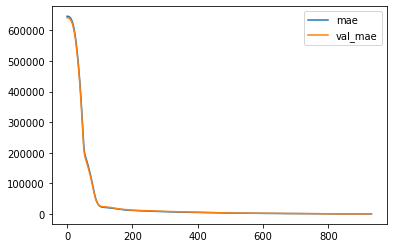

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['mae','val_mae'])

In [ ]:
# 학습을 방해하는 하나의 방법
# model.add(keras.layers.Dropout(0.3)) : 은닉층 30%를 없애버린다는 뜻. 학습에 방해가 되겠지?

In [ ]:
test = samsung[samsung['날짜'].dt.year == 2022]

data = []
target = []

for i in range(len(test) - 1):
    a = list(train.iloc[i, 1:])
    b = test.iloc[i ,1]

    data.append(a)
    target.append(b)

In [ ]:
data = ss.transform(data) # 표준화 해줘야 성능 잘 나와
data

array([[-0.94247844, -0.73659324, -0.94409337, -0.9443136 , -0.94257474,
        -0.39750639],
       [-0.94215266, -0.72078287, -0.94229827, -0.94496043, -0.94191586,
        -0.39374289],
       [-0.94345577, -0.67335174, -0.94246146, -0.94528385, -0.94076281,
        -0.39075053],
       [-0.94150111, -0.64173099, -0.94278784, -0.94399018, -0.9399392 ,
        -0.39345669],
       [-0.94084956, -0.70497249, -0.94148231, -0.94301994, -0.94010392,
        -0.40009012],
       [-0.93514848, -0.45991168, -0.94001359, -0.93784529, -0.93730366,
        -0.39204478],
       [-0.93368249, -0.66544656, -0.93511785, -0.93493455, -0.93203258,
        -0.37154031],
       [-0.93433404, -0.70497249, -0.93364913, -0.93638992, -0.93252674,
        -0.39951454],
       [-0.93531137, -0.68916212, -0.93381232, -0.93671333, -0.93285619,
        -0.40261502],
       [-0.9362887 , -0.68916212, -0.93511785, -0.93784529, -0.93367979,
        -0.40307134],
       [-0.93596292, -0.72078287, -0.93626019, -0.

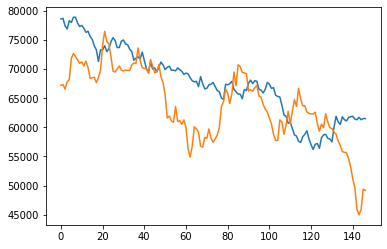

In [ ]:
plt.plot(target)
plt.plot(model.predict(data))

In [ ]:
# 인공 신경망(딥러닝)

# 이미지를 위한 딥러닝 : CNN
# 시계열 딥러닝 : RNN -> LSTM (시계열 : 시간의 흐름이 중요한 데이터)